In [1]:
# # 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
!ls /home/aistudio/data
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
!ls /home/aistudio/work
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
!mkdir /home/aistudio/external-libraries
!pip install pandas -t /home/aistudio/external-libraries

data177282
mkdir: 无法创建目录"/home/aistudio/external-libraries": 文件已存在
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 1.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 952.5 kB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
parl 1.4.1 requires pyzmq==18.1.1, but you have pyzmq 23.2.1 which is incompatible.
paddlefsl 1.0.0 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
paddlefsl 1.0.0 requires tqdm~=4.27.0, but you have tqdm 4.64.1 which is incompatible.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To updat

In [2]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 数据探索与处理

In [4]:
import pandas as pd
#使用pandas加载数据集
data=pd.read_csv("./data/data177282/boston_house_prices.csv")
# 预览前5行数据
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


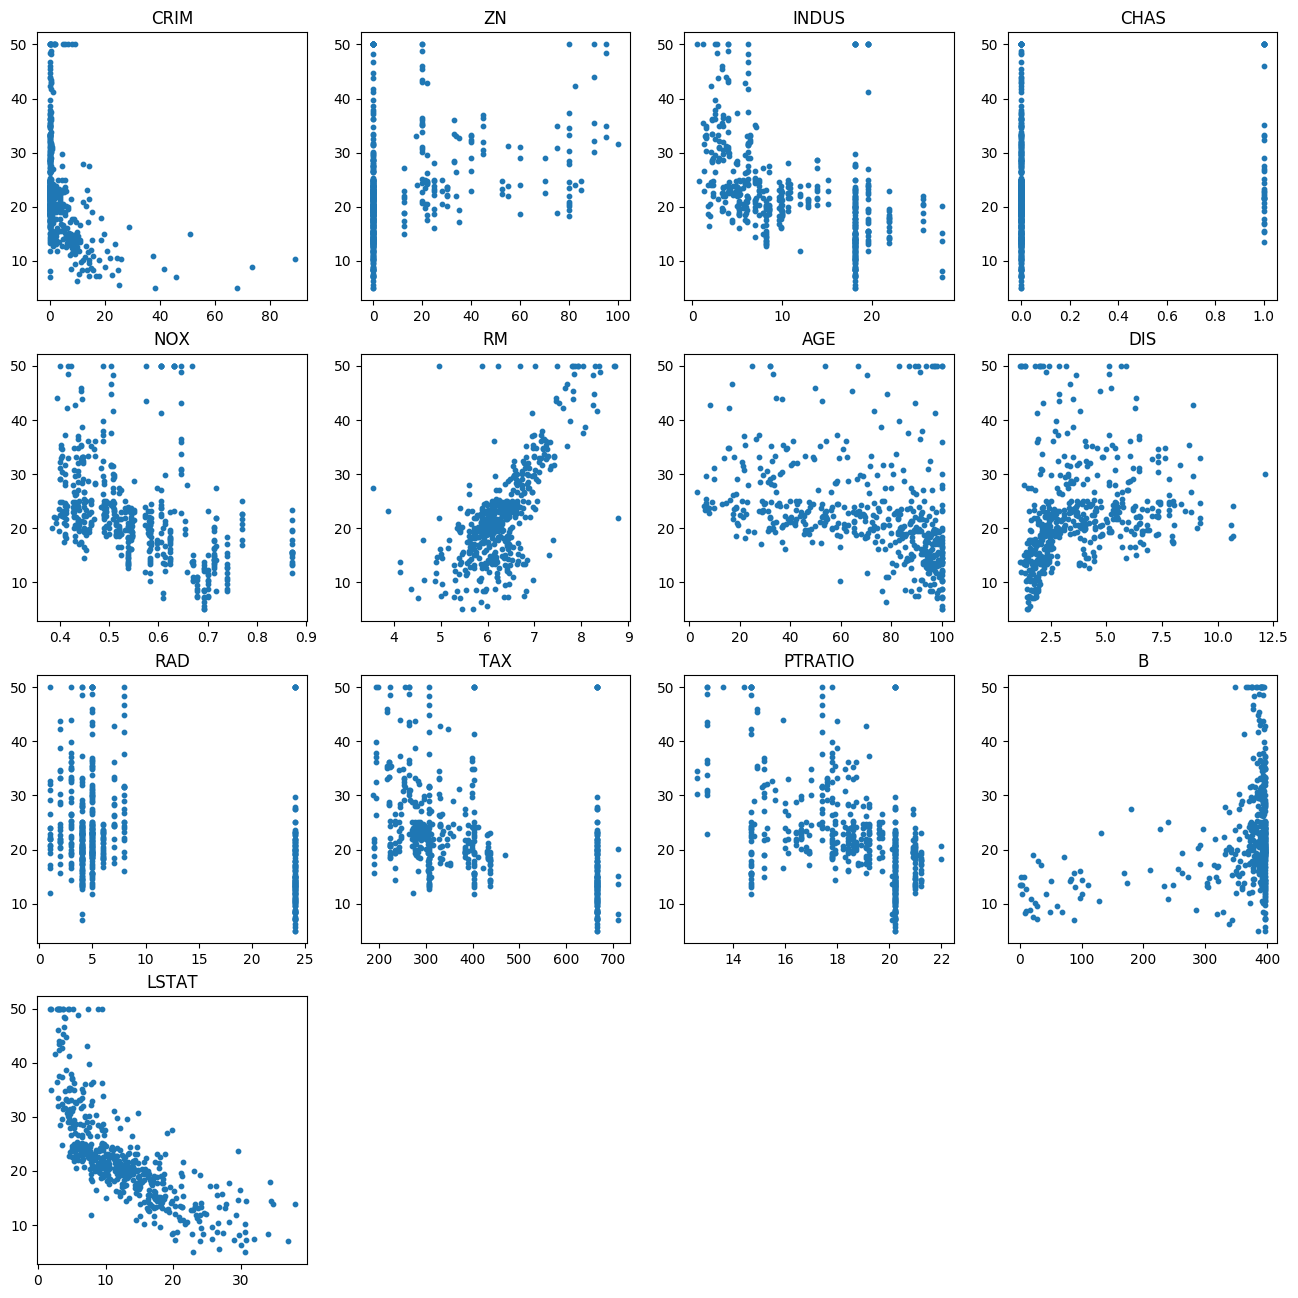

In [5]:
plt.figure(figsize=(16, 16))  # 16x16的画布
y = data["MEDV"]  # 纵轴设置为房价
for i, attribute in enumerate(data.keys()):  # 针对每一个特征都画出与房价的对应关系
    if attribute != 'MEDV':  # 由于特性里面包括房价，这里需要其他的属性，排除房价列
        plt.subplot(4,4,i + 1)  # 子图排版
        x = data[attribute]  # 横轴为其他特性
        plt.scatter(x, y, s=10)  # 散点图
        plt.title(attribute)  # 对应的特性名字
plt.show()  # 生成

# 模型选择与训练

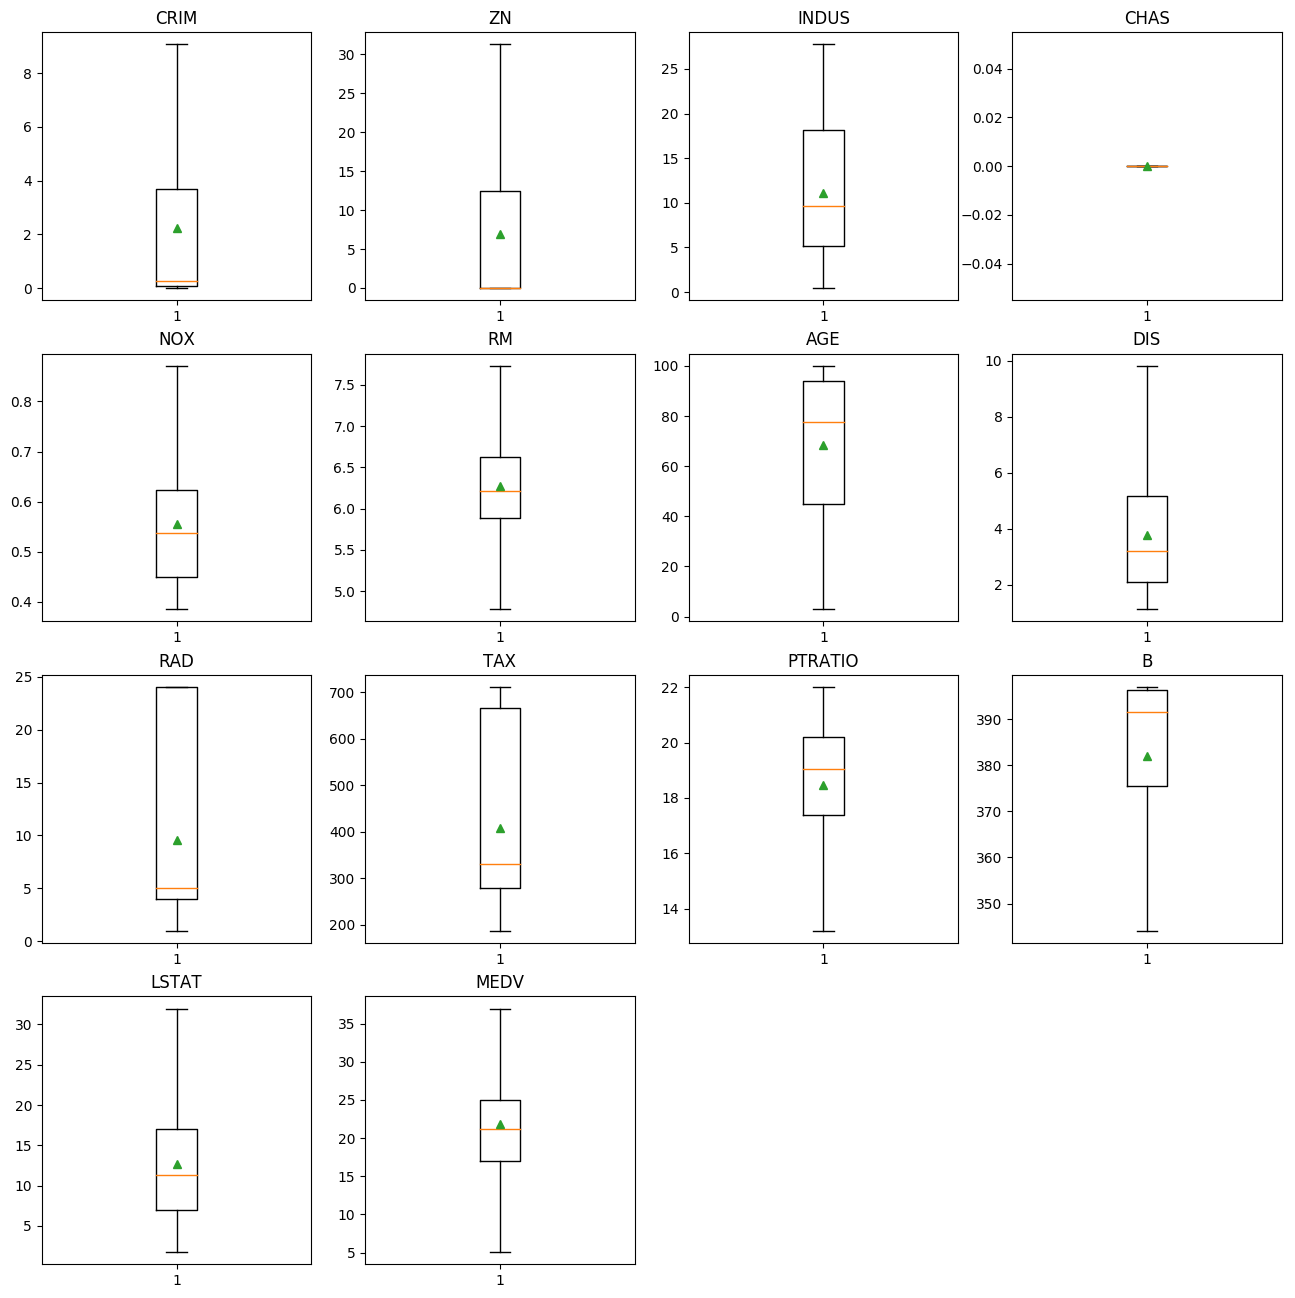

In [6]:
plt.figure(figsize=(16,16))  # 画布大小
for i, attribute in enumerate(data.keys()): # 包括房价在内所有的特性都处理过大的过小的异常值
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    top = Q3 + 1.5 * IQR
    bottom = Q1 - 1.5 * IQR
    values = data[attribute].values
    values[values > top] = top  # 处理过大的异常值
    values[values < bottom] = bottom
    data[attribute] = values.astype(data[attribute].dtypes)  # 替换
    plt.subplot(4, 4, i + 1)  # 设置子图排版
    plt.boxplot(data[attribute],showmeans=True)  # 生成箱线图
    plt.title(attribute)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
# 挑选仅有的两个与房价线性相关的特性LSTAT和RM，并且得是pandas的DataFrame格式，作为输入参数
x = pd.DataFrame({"LSTAT":data["LSTAT"],"RM":data["RM"]})
y = data["MEDV"]
# 按照8：2的比例分裂总数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, shuffle=True)


In [8]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)  # 找出均值和方差进行归一化
x_test = s.transform(x_test)  # 使用相同的均值和方差进行归一化

In [9]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()  # 线性回归模型
lr_model.fit(x_train, y_train)  # 使用fit函数进行训练

print(lr_model.coef_)  # 回归系数
print(lr_model.intercept_)  # 偏置

[-19.75035748  11.30756411]
23.330031558492724


# 模型预测与评估

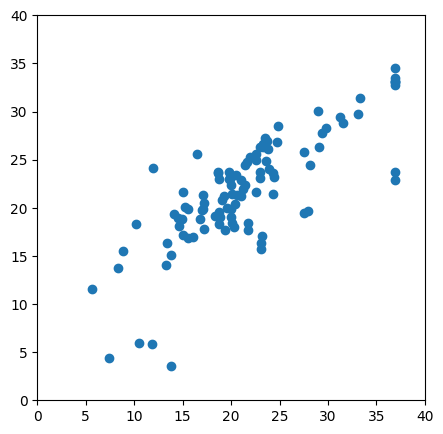

MSE: 18.538743951719656


In [10]:
import sklearn.metrics as mtx
y_pred = lr_model.predict(x_test)  # 训练后的模型对测试数据集进行预测
plt.figure(figsize=(5,5))  # 设置画布大小
plt.scatter(y_test, y_pred)  # 散点图
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.show()
print("MSE:", mtx.mean_squared_error(y_test, y_pred))  # 计算均方误差

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 